# Module 4 - Modelling With Keras

### Problem Statement:

Consider yourself to be Matt, who is a Deep Learning Engineer at a prestigious company. Your company is working with the National Institute of Diabetes to find out what are the factors which lead up to a patient having diabetes.

### Tasks to be Done:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


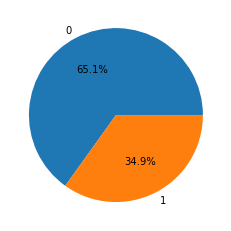

In [7]:
plt.pie(diabetes['Outcome'].value_counts().tolist(),labels=diabetes['Outcome'].value_counts().keys().tolist(),autopct="%0.1f%%")
plt.show()

In [8]:
X=diabetes[['Pregnancies','Glucose','BloodPressure']]
Y=diabetes[['Outcome']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [9]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model=Sequential()
model.add(Dense(8,input_dim=3))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test,Y_test))

Epoch 1/100
62/62 [==============================] - 2s 13ms/step - loss: 2.8386 - accuracy: 0.6889 - val_loss: 1.3838 - val_accuracy: 0.7857
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 4.0098 - accuracy: 0.6254 - val_loss: 9.6531 - val_accuracy: 0.3571
Epoch 3/100
62/62 [==============================] - 0s 5ms/step - loss: 9.6819 - accuracy: 0.3616 - val_loss: 10.1282 - val_accuracy: 0.3247
Epoch 4/100
62/62 [==============================] - 0s 5ms/step - loss: 9.6988 - accuracy: 0.3616 - val_loss: 10.2099 - val_accuracy: 0.3247
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6610 - accuracy: 0.3599 - val_loss: 10.1189 - val_accuracy: 0.3312
Epoch 6/100
62/62 [==============================] - 0s 5ms/step - loss: 9.6244 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 8

62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 60/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 61/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 62/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 9.6649 - accuracy: 0.3664 - val_loss: 10.5199 - val_accuracy: 0.3052
Epoch 65/100

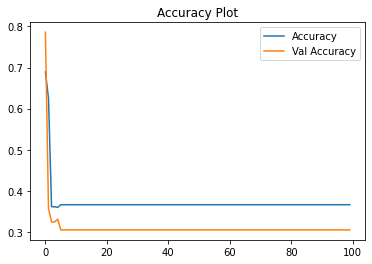

In [12]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

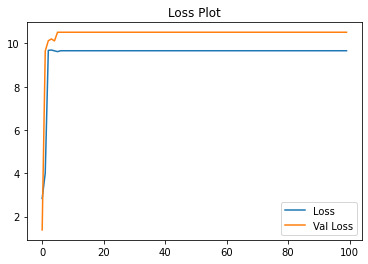

In [13]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [14]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

5/5 [==============================] - 0s 4ms/step


In [15]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[  3 104]
 [  3  44]]
Accuracy Score: 30.519480519480517
              precision    recall  f1-score   support

           0       0.50      0.03      0.05       107
           1       0.30      0.94      0.45        47

    accuracy                           0.31       154
   macro avg       0.40      0.48      0.25       154
weighted avg       0.44      0.31      0.17       154



In [16]:
X=diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y=diabetes[['Outcome']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [17]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
model=Sequential()
model.add(Dense(16,input_dim=8))
model.add(Dense(16,input_dim=8))
model.add(Dense(16,input_dim=8))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test,Y_test))

Epoch 1/100
62/62 [==============================] - 2s 10ms/step - loss: 2.2420 - accuracy: 0.7085 - val_loss: 1.3653 - val_accuracy: 0.7532
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 1.8174 - accuracy: 0.7248 - val_loss: 1.1635 - val_accuracy: 0.7532
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 1.8289 - accuracy: 0.7280 - val_loss: 1.5202 - val_accuracy: 0.7273
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 1.3486 - accuracy: 0.7329 - val_loss: 0.8318 - val_accuracy: 0.7208
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 1.2616 - accuracy: 0.7296 - val_loss: 1.4252 - val_accuracy: 0.6948
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 2.0200 - accuracy: 0.6612 - val_loss: 1.1707 - val_accuracy: 0.7078
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 2.0305 - accuracy: 0.6596 - val_loss: 2.0355 - val_accuracy: 0.6948
Epoch 8/100


Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7199 - val_loss: 0.5627 - val_accuracy: 0.7727
Epoch 60/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7410 - val_loss: 0.5509 - val_accuracy: 0.7792
Epoch 61/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.7443 - val_loss: 0.5635 - val_accuracy: 0.7662
Epoch 62/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7427 - val_loss: 0.5515 - val_accuracy: 0.7662
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.7476 - val_loss: 0.6175 - val_accuracy: 0.7792
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7410 - val_loss: 0.6076 - val_accuracy: 0.7857
Epoch 65/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7410 - val_loss: 0.5221 - val_accuracy: 0.8312
Epoch 

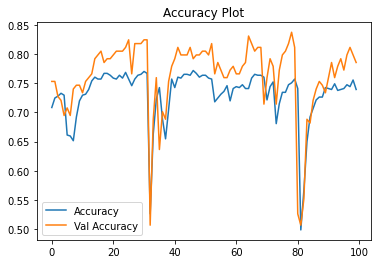

In [20]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

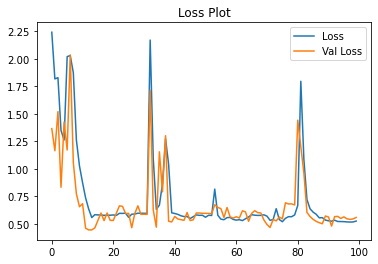

In [21]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [22]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

5/5 [==============================] - 0s 6ms/step


In [23]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred)*100)
print(classification_report(Y_test, Y_pred))

[[94 13]
 [20 27]]
Accuracy Score: 78.57142857142857
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

